<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/99.%20Final%20Project/Modeling%20with%20OHE%20with%20drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Context**
- The telco customer churn data contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Problem Background**
- Customer churn is one of the biggest problems in the telecommunications industry
- By definition, customer churn is when customers stop interacting (subscribe) with the company
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understand the customer behaviors: what keeps customers using the service and what makes them leave the service
<br><br>

**Contents**
1. Dataset Information
2. Importing Libraries
3. Dataset Overview
4. Dataset Overview - Function
5. Exploratory Data Analysis
6. Data Preprocessing

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not
<br><br>

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.

# 2. Importing Libraries

In [1]:
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
# !pip install xgboost
# !pip install lightgbm
!pip install catboost

!pip install inflection
# !pip install dython

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [2]:
# association between attributes
# from dython.nominal import associations

# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# 4. Dataset Overview - Function

In [3]:
#@title Just Run This Function

def get_camel_case(data):
  # renaming column
  column_list = list(data.columns)

  for i, col in enumerate(column_list):
    column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

  return column_list

def get_data_type(data, column_list_numerical):
  # general data type
  data_type_general = dict()

  for col in data.columns:
    if col in column_list_numerical:
      data_type_general[col] = 'numerical'
    else:
      data_type_general[col] = 'categorical'

  tmp = pd.Series(data_type_general)
  data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
  
  # pythonic data type
  data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
  data['total_charges'].fillna(0, inplace=True)
  data['total_charges'] = data['total_charges'].astype(float)

  data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})

  return data_type_general, data_type_python

def get_data_variation(data, column_list_numerical, column_list_categorical):
  # numerical data variation
  variation_numerical = dict()

  for col in column_list_numerical:
    tmp = f'{data[col].min()} - {data[col].max()}'
    variation_numerical[col] = tmp

  tmp = pd.Series(variation_numerical)
  data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # categorical data variation
  variation_categorical = dict()

  for col in column_list_categorical:
    tmp = data[col].unique().tolist()
    tmp.sort()
    variation_categorical[col] = ', '.join(str(item) for item in tmp)

  tmp = pd.Series(variation_categorical)
  data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # overall data variation
  data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)

  return data_variation

def get_dataset_overview(data):
  # renaming column
  column_list = get_camel_case(data)
  data.columns = column_list

  # total duplicated values
  # print('Total duplicated values:', data.duplicated().sum())

  # dropping column 
  data.drop('customer_id', axis=1, inplace=True)

  # column list
  column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']
  column_list_categorical = list(data.columns)
  column_list_categorical.remove('tenure')
  column_list_categorical.remove('monthly_charges')
  column_list_categorical.remove('total_charges')

  # data type
  data_type_general, data_type_python = get_data_type(data, column_list_numerical)

  # total data
  data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})

  # total null values
  data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})

  # percentage of null values
  data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})

  # data variation
  data_variation = get_data_variation(data, column_list_numerical, column_list_categorical)

  data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

  data_info = data_info.reindex(data.columns, axis=1)

  return data, data_info

In [4]:
#@title And Then Run This
path = 'https://raw.githubusercontent.com/adhang/datasets/main/telco-customer-churn.csv'

data = pd.read_csv(path)
data, data_info = get_dataset_overview(data)

# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

In [ ]:
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# 6. Data Preprocessing

## Preprocessing

In [16]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

# =========================================
# TRAIN - TEST SPLIT
# =========================================
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

# =========================================
# LABEL ENCODING
# =========================================
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

# =========================================
# ONE HOT ENCODING
# =========================================
# ohe = OneHotEncoder(sparse=False, drop='first')
ohe = OneHotEncoder(sparse=False, drop='if_binary')
# ohe = OneHotEncoder(sparse=False)

ohe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

# =========================================
# OHE COLUMN TO SNAKE CASAE
# =========================================
# rename ohe column to snake_case
column_ohe = ohe.get_feature_names_out()

for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('(automatic)','')

# =========================================
# COMBINE NUMERICAL COLUMN & ENCODED CATEGORICAL
# =========================================
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)

# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)

# =========================================
# FEATURE SCALING
# =========================================
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## Encoded Dataframe

In [17]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['churn_1'].fillna(data_encode['churn_2'], inplace=True)
data_encode.drop(columns='churn_2', inplace=True)
data_encode.rename(columns={'churn_1':'churn'}, inplace=True)

data_encode.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_no,multiple_lines_no_phone_service,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer_,payment_method_credit_card_,payment_method_electronic_check,payment_method_mailed_check,churn
6427,41,20.15,802.35,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,18,99.75,1836.25,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,71,66.85,4748.70,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,1,79.60,79.60,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,48,70.65,3545.05,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Scaled Dataframe
This dataframe has been encoded and scaled

In [18]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)

data_scale.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_1,partner_yes,dependents_yes,phone_service_yes,multiple_lines_no,multiple_lines_no_phone_service,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer_,payment_method_credit_card_,payment_method_electronic_check,payment_method_mailed_check,churn
6427,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Correlation

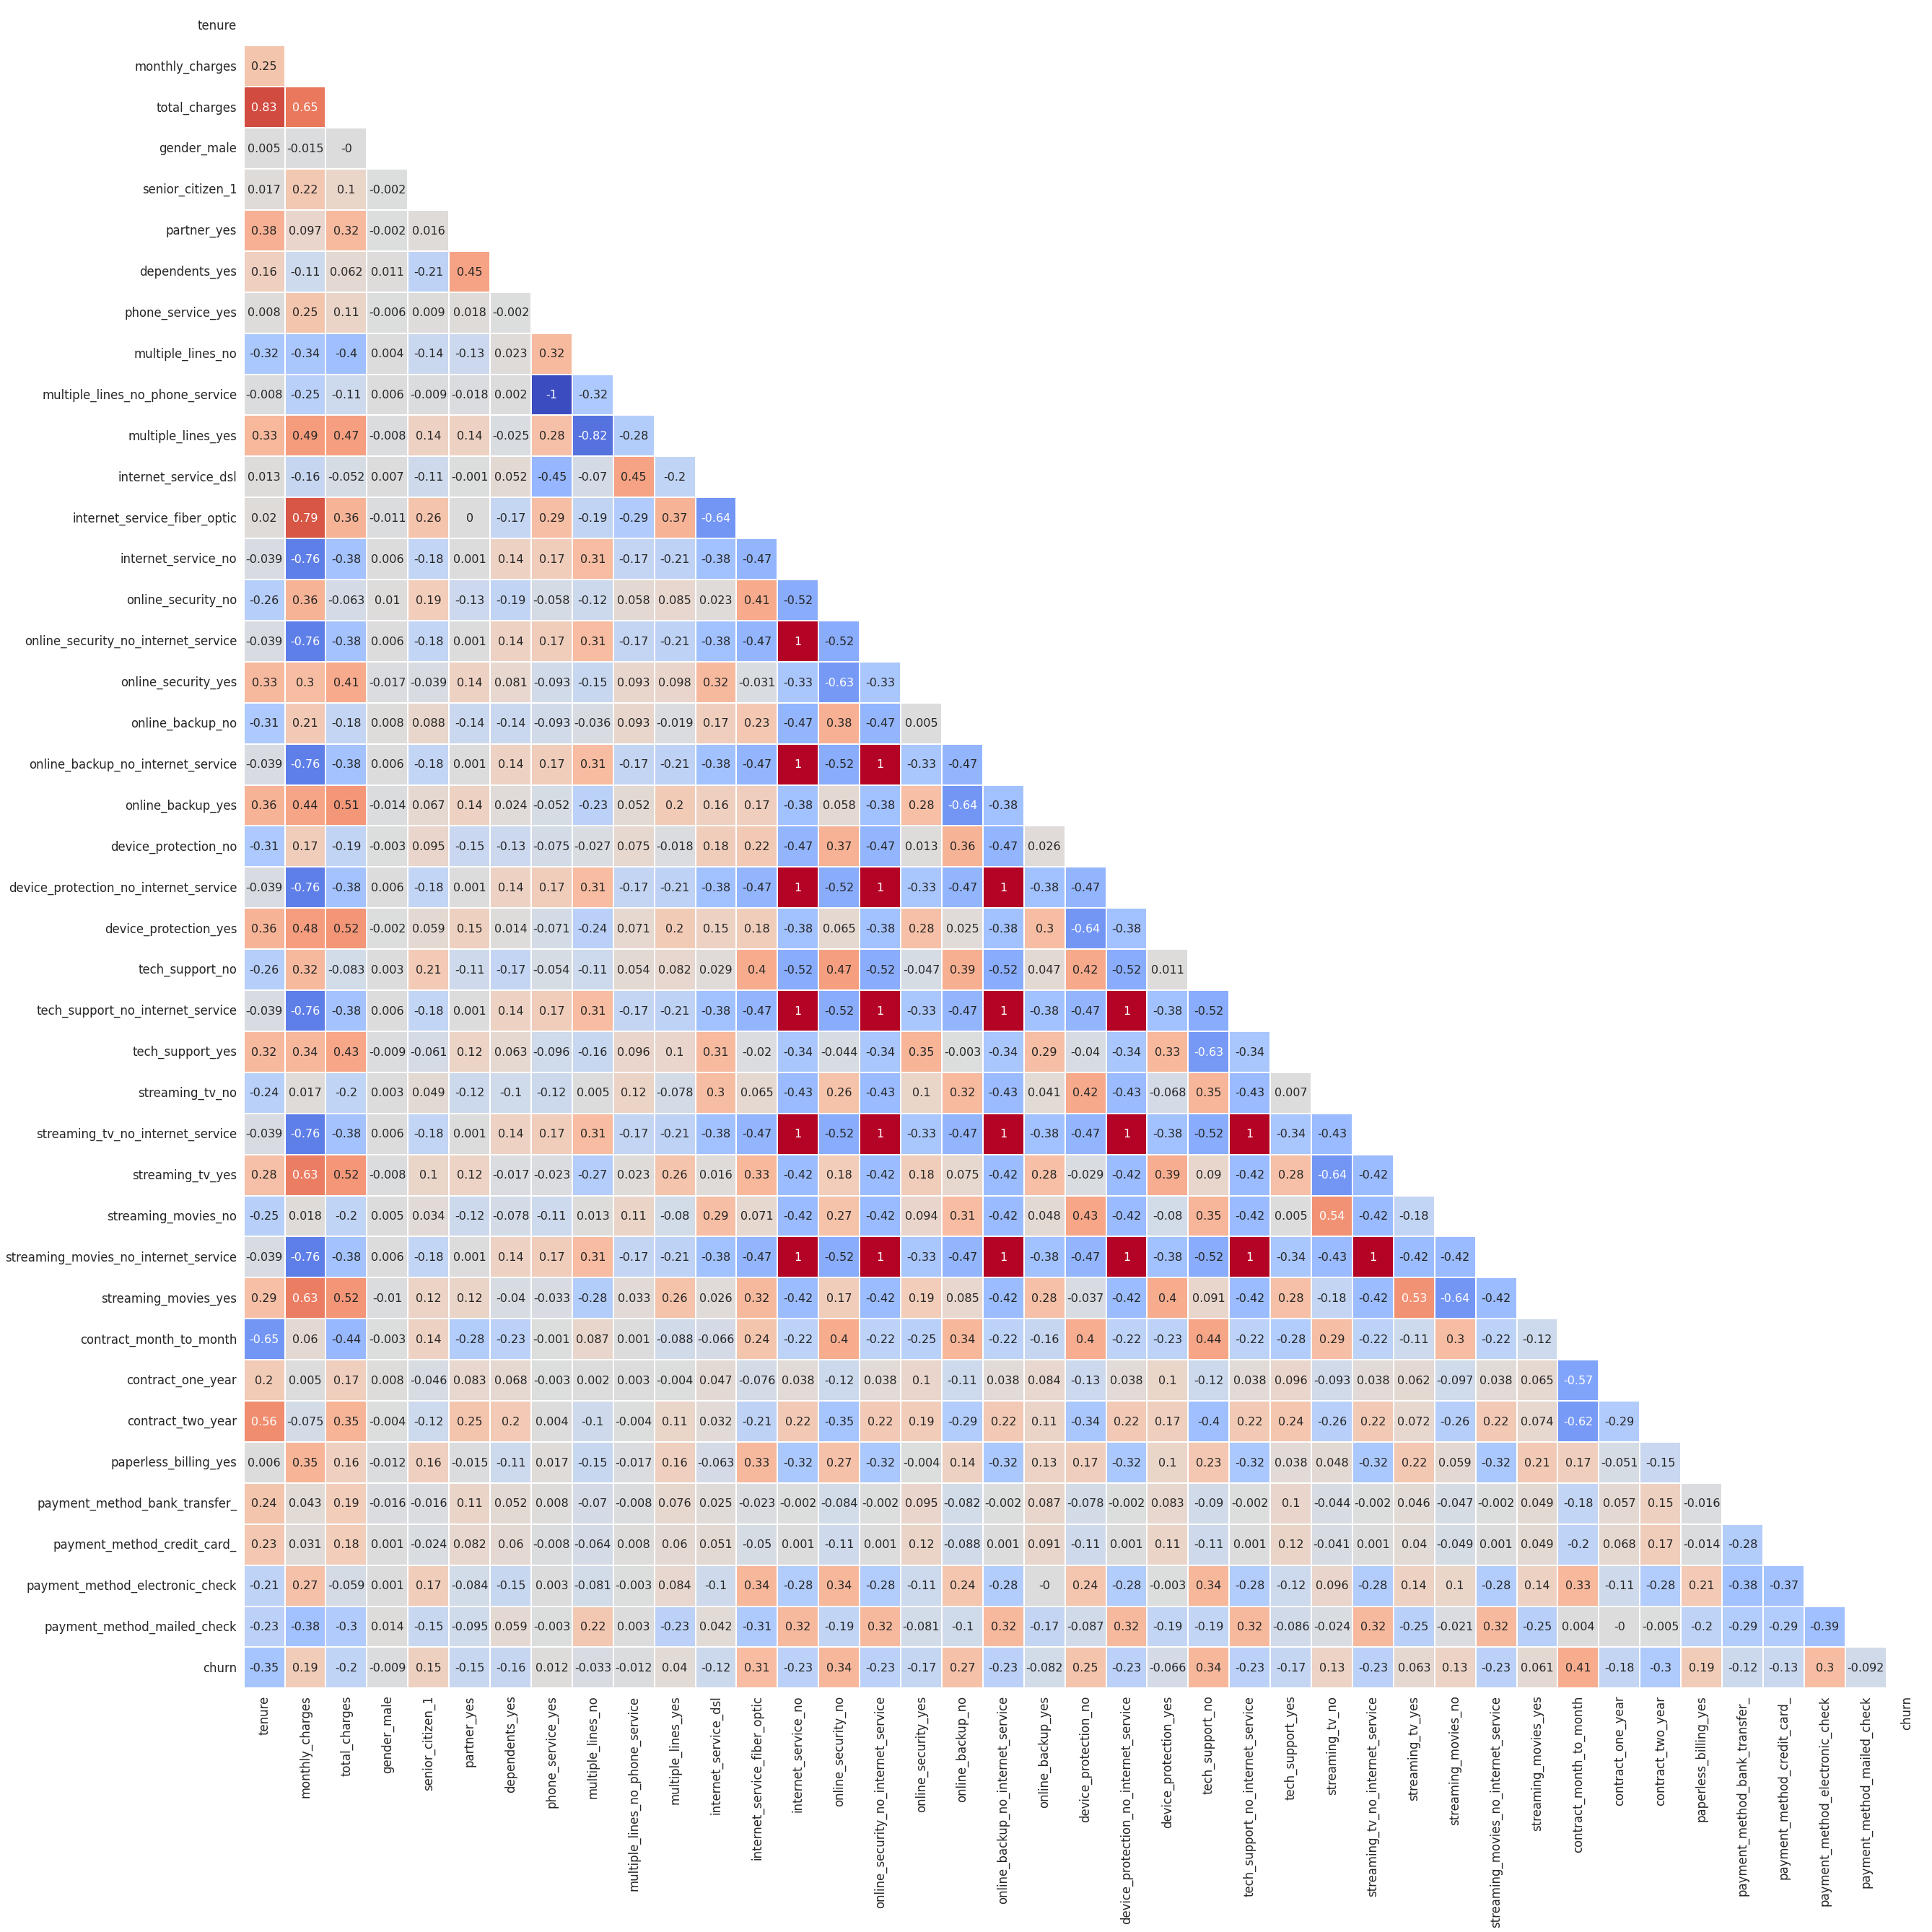

In [19]:
corr_matrix = data_scale.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

## Resampling

In [20]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
# column_categorical.remove('churn')

### SMOTE

In [21]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

### SMOTENC

In [22]:
# column 3-45 is categorical (exclude the target)
smotenc = SMOTENC(random_state=1, categorical_features=np.arange(3,X_train_scale.shape[1])) # 46 because exclusive

X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train_scale, y_train_encode)

X_train_smotenc_df = pd.DataFrame(X_train_smotenc, columns=X_train_smotenc.columns)
y_train_smotenc_df = pd.DataFrame(y_train_smotenc, columns=['churn'])

data_smotenc = pd.concat([X_train_smotenc_df, y_train_smotenc_df], axis=1)

### ADASYN

In [23]:
adasyn = ADASYN(random_state=1)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scale, y_train_encode)

X_train_adasyn_df = pd.DataFrame(X_train_adasyn, columns=X_train_adasyn.columns)
y_train_adasyn_df = pd.DataFrame(y_train_adasyn, columns=['churn'])

data_adasyn = pd.concat([X_train_adasyn_df, y_train_adasyn_df], axis=1)

# Modeling

## Function

### Print Single Report

In [24]:
def print_report(y_test, y_pred, average='macro', full_report=True):
  if full_report:
    print(classification_report(y_test, y_pred, digits=3))
    print('==============================================================')
    print('==============================================================')

  print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
  print('Precision\t: ', round(precision_score(y_test, y_pred, average=average),3)) 
  print('Recall\t\t: ', round(recall_score(y_test, y_pred, average=average),3))
  print('F1 Score\t: ', round(f1_score(y_test, y_pred, average=average),3)) 
  print('ROC AUC\t\t: ', round(roc_auc_score(y_test, y_pred, average=average),3)) 

### Highlight Max-Min

In [25]:
def highlight_max_min(df):
  display(df.round(3).style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

### Print Score

In [26]:
def print_score(y_pred_list, y_test, orderby='accuracy', average='macro', sort=True):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average=average))
    recall.append(recall_score(y_test, y_pred, average=average))
    f1.append(f1_score(y_test, y_pred, average=average))
    roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

  score_list = {
      'model':model_name,
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1_score':f1,
      'roc_auc':roc_auc
  }

  if sort:
    score_df = pd.DataFrame(score_list).set_index('model').sort_values(orderby, ascending=False)
  else:
    score_df = pd.DataFrame(score_list).set_index('model')
    
  highlight_max_min(score_df)

  return score_df

### Grid Search

In [27]:
def grid_search(model, grid, X, y, name='', scoring='accuracy'):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  grid_search = GridSearchCV(estimator=model, param_grid=grid,
                             n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
  
  grid_result = grid_search.fit(X, y)

  # summarize results
  print(f'{name}\t: {round(grid_result.best_score_,3)} with {grid_result.best_params_}')

  # means = grid_result.cv_results_['mean_test_score']
  # stds = grid_result.cv_results_['std_test_score']
  # params = grid_result.cv_results_['params']
  # for mean, stdev, param in zip(means, stds, params):
  #     print("%f (%f) with: %r" % (mean, stdev, param))

  return grid_result.best_params_, grid_result.best_estimator_

## Default Parameter

In [28]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Ridge Classifier':RidgeClassifier(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'AdaBoost':AdaBoostClassifier(random_state=1),
    'Gradient Boosting':GradientBoostingClassifier(random_state=1),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1),
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'LightGBM':LGBMClassifier(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1)
}

### SMOTE

In [29]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.749000,0.710000,0.758000,0.717000,0.758000
Ridge Classifier,0.748000,0.710000,0.758000,0.716000,0.758000
KNN,0.674000,0.646000,0.684000,0.642000,0.684000
SVC,0.758000,0.706000,0.740000,0.716000,0.740000
Decision Tree,0.727000,0.660000,0.673000,0.665000,0.673000
Random Forest,0.778000,0.716000,0.720000,0.718000,0.720000
AdaBoost,0.784000,0.734000,0.771000,0.745000,0.771000
Gradient Boosting,0.787000,0.732000,0.757000,0.742000,0.757000
Hist Gradient Boosting,0.779000,0.717000,0.725000,0.721000,0.725000


### SMOTENC

In [30]:
X_train_model = X_train_smotenc.copy()
y_train_model = y_train_smotenc.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smotenc = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.761000,0.717000,0.761000,0.727000,0.761000
Ridge Classifier,0.752000,0.708000,0.752000,0.716000,0.752000
KNN,0.694000,0.653000,0.688000,0.655000,0.688000
SVC,0.747000,0.696000,0.730000,0.705000,0.730000
Decision Tree,0.705000,0.641000,0.659000,0.647000,0.659000
Random Forest,0.770000,0.709000,0.722000,0.714000,0.722000
AdaBoost,0.752000,0.712000,0.759000,0.719000,0.759000
Gradient Boosting,0.760000,0.712000,0.752000,0.722000,0.752000
Hist Gradient Boosting,0.764000,0.708000,0.735000,0.717000,0.735000


### ADASYN

In [31]:
X_train_model = X_train_adasyn.copy()
y_train_model = y_train_adasyn.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_adasyn = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.726000,0.702000,0.756000,0.701000,0.756000
Ridge Classifier,0.725000,0.702000,0.757000,0.700000,0.757000
KNN,0.654000,0.640000,0.679000,0.628000,0.679000
SVC,0.730000,0.692000,0.737000,0.697000,0.737000
Decision Tree,0.720000,0.651000,0.663000,0.656000,0.663000
Random Forest,0.781000,0.721000,0.730000,0.725000,0.730000
AdaBoost,0.760000,0.711000,0.750000,0.721000,0.750000
Gradient Boosting,0.787000,0.733000,0.761000,0.743000,0.761000
Hist Gradient Boosting,0.785000,0.725000,0.732000,0.728000,0.732000


### Compare

In [32]:
scoring_list = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

score_compare = dict()

for score in scoring_list:
  col_smote = score_smote.loc[:, score]
  col_smotenc = score_smote.loc[:, score]
  col_adasyn = score_adasyn.loc[:, score]

  score_dict = {
    col_smote.name + '_smote' : col_smote.values,
    col_smotenc.name + '_smotenc' : col_smotenc.values,
    col_adasyn.name + '_adasyn' : col_adasyn.values,
  }

  # score_df = pd.DataFrame(score_dict, index=col_smote.index).sort_values(score+'_smote', ascending=False)
  score_df = pd.DataFrame(score_dict, index=col_smote.index)
  # display(score_df.style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

  score_compare[score] = score_df

#### Accuracy

In [33]:
highlight_max_min(score_compare['accuracy'])

,accuracy_smote,accuracy_smotenc,accuracy_adasyn
model,,,
Logistic Regression,0.749000,0.749000,0.726000
Ridge Classifier,0.748000,0.748000,0.725000
KNN,0.674000,0.674000,0.654000
SVC,0.758000,0.758000,0.730000
Decision Tree,0.727000,0.727000,0.720000
Random Forest,0.778000,0.778000,0.781000
AdaBoost,0.784000,0.784000,0.760000
Gradient Boosting,0.787000,0.787000,0.787000
Hist Gradient Boosting,0.779000,0.779000,0.785000


#### Precision

In [34]:
highlight_max_min(score_compare['precision'])

,precision_smote,precision_smotenc,precision_adasyn
model,,,
Logistic Regression,0.710000,0.710000,0.702000
Ridge Classifier,0.710000,0.710000,0.702000
KNN,0.646000,0.646000,0.640000
SVC,0.706000,0.706000,0.692000
Decision Tree,0.660000,0.660000,0.651000
Random Forest,0.716000,0.716000,0.721000
AdaBoost,0.734000,0.734000,0.711000
Gradient Boosting,0.732000,0.732000,0.733000
Hist Gradient Boosting,0.717000,0.717000,0.725000


#### Recall

In [35]:
highlight_max_min(score_compare['recall'])

,recall_smote,recall_smotenc,recall_adasyn
model,,,
Logistic Regression,0.758000,0.758000,0.756000
Ridge Classifier,0.758000,0.758000,0.757000
KNN,0.684000,0.684000,0.679000
SVC,0.740000,0.740000,0.737000
Decision Tree,0.673000,0.673000,0.663000
Random Forest,0.720000,0.720000,0.730000
AdaBoost,0.771000,0.771000,0.750000
Gradient Boosting,0.757000,0.757000,0.761000
Hist Gradient Boosting,0.725000,0.725000,0.732000


#### F1 Score

In [36]:
highlight_max_min(score_compare['f1_score'])

,f1_score_smote,f1_score_smotenc,f1_score_adasyn
model,,,
Logistic Regression,0.717000,0.717000,0.701000
Ridge Classifier,0.716000,0.716000,0.700000
KNN,0.642000,0.642000,0.628000
SVC,0.716000,0.716000,0.697000
Decision Tree,0.665000,0.665000,0.656000
Random Forest,0.718000,0.718000,0.725000
AdaBoost,0.745000,0.745000,0.721000
Gradient Boosting,0.742000,0.742000,0.743000
Hist Gradient Boosting,0.721000,0.721000,0.728000


#### ROC AUC

In [37]:
highlight_max_min(score_compare['roc_auc'])

,roc_auc_smote,roc_auc_smotenc,roc_auc_adasyn
model,,,
Logistic Regression,0.758000,0.758000,0.756000
Ridge Classifier,0.758000,0.758000,0.757000
KNN,0.684000,0.684000,0.679000
SVC,0.740000,0.740000,0.737000
Decision Tree,0.673000,0.673000,0.663000
Random Forest,0.720000,0.720000,0.730000
AdaBoost,0.771000,0.771000,0.750000
Gradient Boosting,0.757000,0.757000,0.761000
Hist Gradient Boosting,0.725000,0.725000,0.732000


## Feature Selection (SMOTE)

In [38]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

### Univariate Filter

before filter	: (7244, 40)
after filter	: (7244, 10)


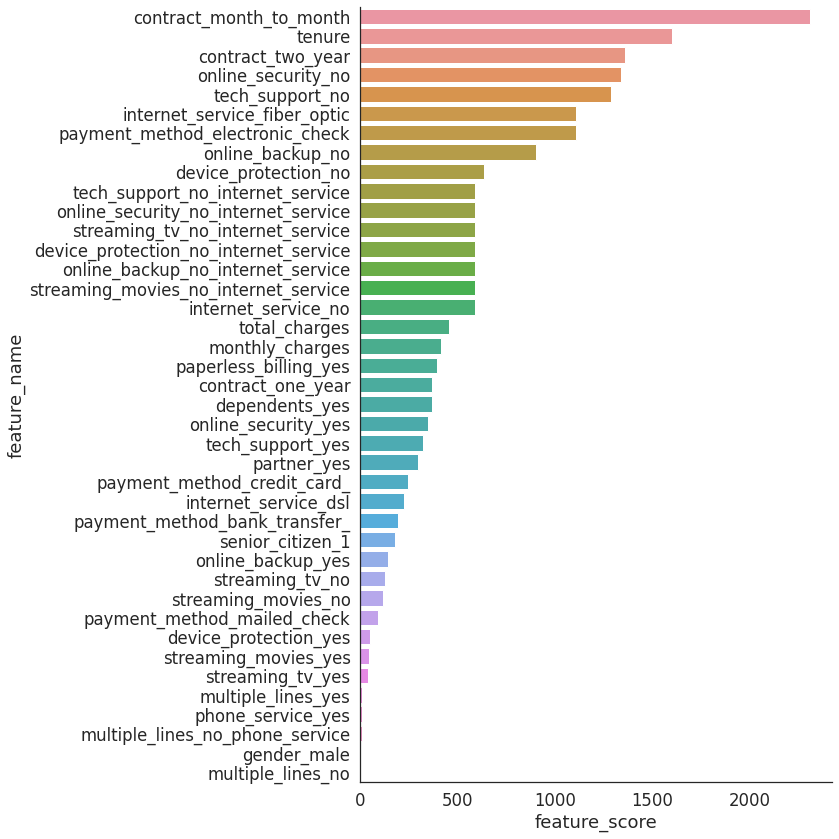

In [39]:
filter = SelectKBest(score_func=f_classif, k=10)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_scale)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_score', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [40]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_smote_filter = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.743000,0.706000,0.754000,0.712000,0.754000
Ridge Classifier,0.740000,0.705000,0.755000,0.710000,0.755000
KNN,0.740000,0.687000,0.719000,0.695000,0.719000
SVC,0.754000,0.709000,0.751000,0.718000,0.751000
Decision Tree,0.735000,0.665000,0.671000,0.668000,0.671000
Random Forest,0.741000,0.679000,0.698000,0.686000,0.698000
AdaBoost,0.757000,0.715000,0.762000,0.723000,0.762000
Gradient Boosting,0.758000,0.713000,0.755000,0.722000,0.755000
Hist Gradient Boosting,0.761000,0.710000,0.744000,0.720000,0.744000


### Wrapper Method (RFE)

#### Logistic Regression

before wrapper	: (7244, 40)
after wrapper	: (7244, 10)


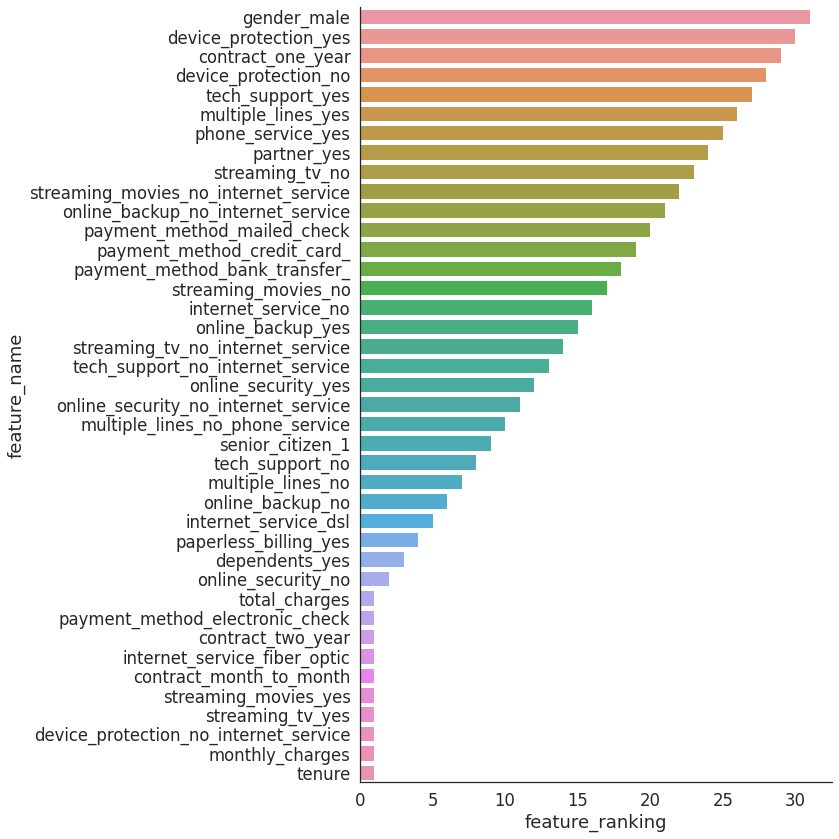

In [41]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression()

wrapper = RFE(estimator=estimator, n_features_to_select=10)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap_lr = wrapper.transform(X_train_model)
X_test_wrap_lr = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap_lr.shape)

# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_ranking', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [42]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap_lr, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_lr)

score_smote_wrap_lr = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.751000,0.713000,0.762000,0.719000,0.762000
Ridge Classifier,0.743000,0.707000,0.757000,0.713000,0.757000
KNN,0.743000,0.694000,0.730000,0.703000,0.730000
SVC,0.744000,0.708000,0.758000,0.714000,0.758000
Decision Tree,0.713000,0.650000,0.670000,0.656000,0.670000
Random Forest,0.747000,0.687000,0.707000,0.694000,0.707000
AdaBoost,0.754000,0.709000,0.751000,0.718000,0.751000
Gradient Boosting,0.752000,0.708000,0.750000,0.716000,0.750000
Hist Gradient Boosting,0.756000,0.703000,0.737000,0.713000,0.737000


#### Decision Tree

before wrapper	: (7244, 40)
after wrapper	: (7244, 10)


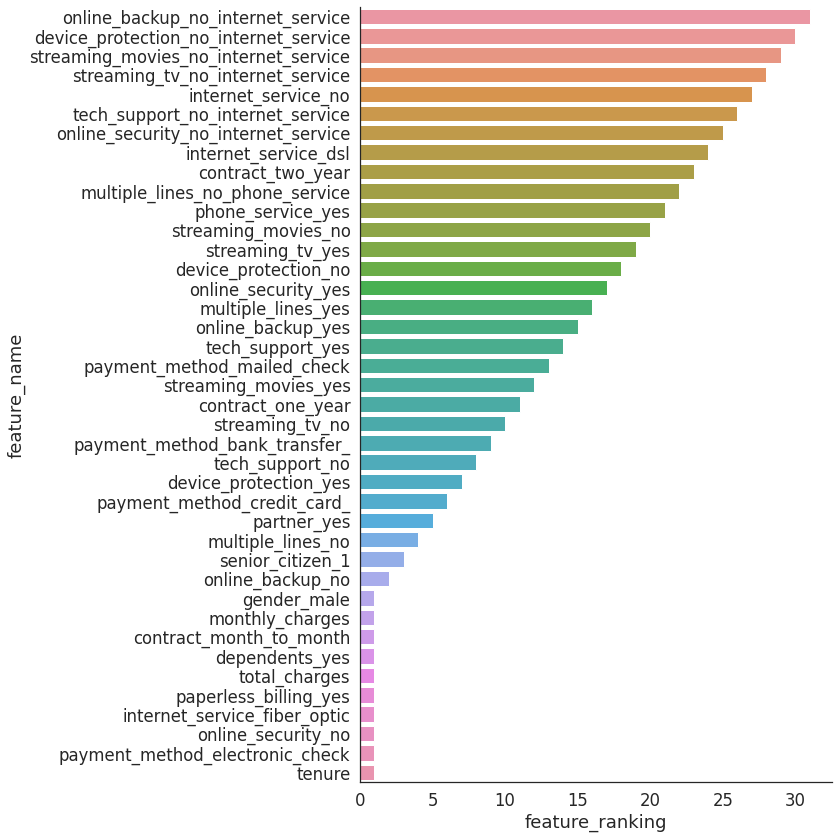

In [43]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = DecisionTreeClassifier(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=10)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap_dt = wrapper.transform(X_train_model)
X_test_wrap_dt = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap_dt.shape)

# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_ranking', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [44]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_wrap_dt = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.752000,0.714000,0.764000,0.721000,0.764000
Ridge Classifier,0.747000,0.710000,0.760000,0.716000,0.760000
KNN,0.741000,0.681000,0.703000,0.688000,0.703000
SVC,0.751000,0.703000,0.742000,0.712000,0.742000
Decision Tree,0.728000,0.663000,0.680000,0.669000,0.680000
Random Forest,0.762000,0.698000,0.709000,0.703000,0.709000
AdaBoost,0.776000,0.725000,0.761000,0.736000,0.761000
Gradient Boosting,0.772000,0.719000,0.751000,0.730000,0.751000
Hist Gradient Boosting,0.778000,0.719000,0.735000,0.726000,0.735000


### Embedded Method

#### Logistic Regression

before embedded	: (7244, 40)
after embedded	: (7244, 7)


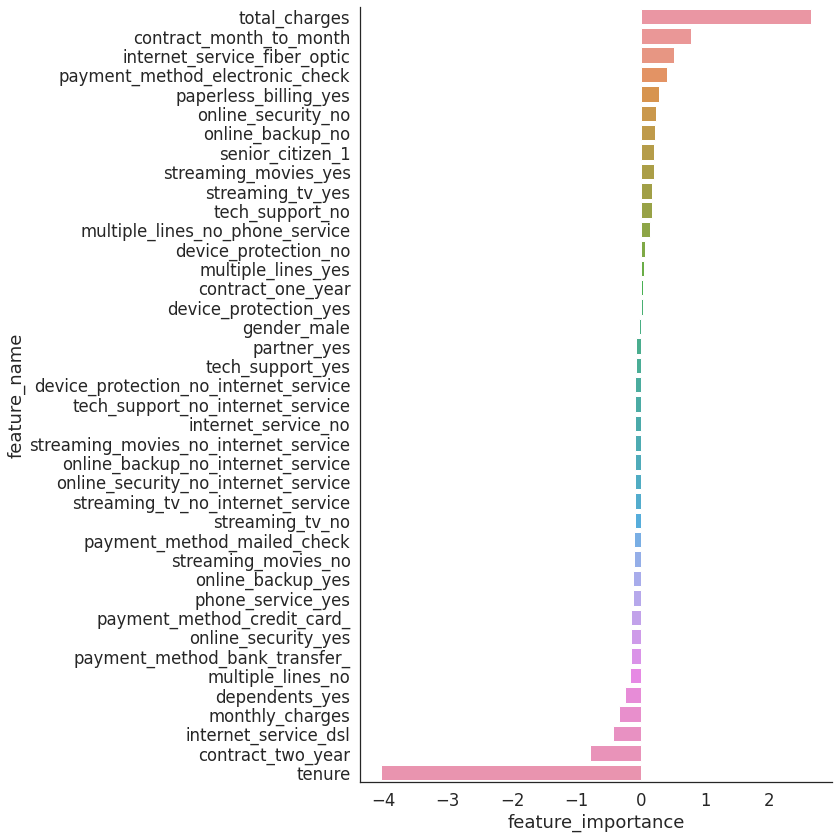

In [45]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression()

embedded = SelectFromModel(estimator=estimator)
embedded.fit(X_train_model, y_train_model)

X_train_embed_lr = embedded.transform(X_train_model)
X_test_embed_lr = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed_lr.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_importance', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [46]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed_lr, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed_lr)

score_smote_embed_lr = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.743000,0.710000,0.762000,0.714000,0.762000
Ridge Classifier,0.740000,0.707000,0.759000,0.711000,0.759000
KNN,0.728000,0.675000,0.705000,0.682000,0.705000
SVC,0.734000,0.703000,0.755000,0.706000,0.755000
Decision Tree,0.709000,0.641000,0.655000,0.646000,0.655000
Random Forest,0.735000,0.667000,0.679000,0.672000,0.679000
AdaBoost,0.749000,0.711000,0.760000,0.718000,0.760000
Gradient Boosting,0.748000,0.705000,0.748000,0.713000,0.748000
Hist Gradient Boosting,0.747000,0.701000,0.740000,0.709000,0.740000


#### Decision Tree

before embedded	: (7244, 40)
after embedded	: (7244, 7)


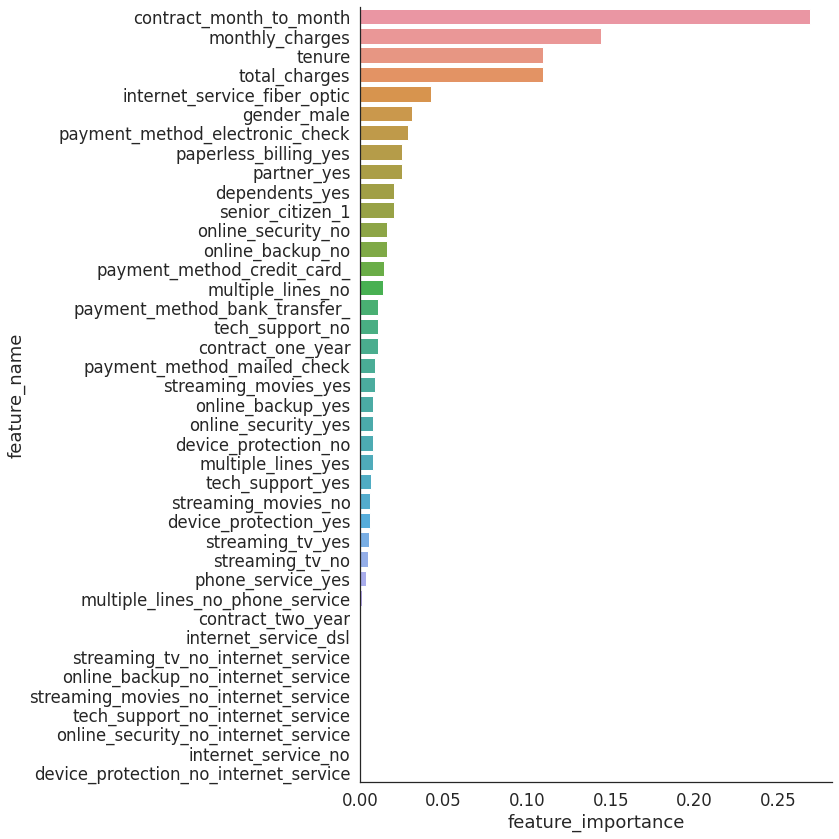

In [47]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = DecisionTreeClassifier(random_state=1)

embedded = SelectFromModel(estimator=estimator)
embedded.fit(X_train_model, y_train_model)

X_train_embed_dt = embedded.transform(X_train_model)
X_test_embed_dt = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed_dt.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.feature_importances_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_importance', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [48]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed_dt)

score_smote_embed_dt = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.748000,0.709000,0.758000,0.716000,0.758000
Ridge Classifier,0.740000,0.703000,0.751000,0.708000,0.751000
KNN,0.744000,0.687000,0.713000,0.696000,0.713000
SVC,0.758000,0.706000,0.739000,0.715000,0.739000
Decision Tree,0.719000,0.654000,0.671000,0.660000,0.671000
Random Forest,0.753000,0.690000,0.706000,0.697000,0.706000
AdaBoost,0.764000,0.716000,0.755000,0.726000,0.755000
Gradient Boosting,0.761000,0.712000,0.750000,0.722000,0.750000
Hist Gradient Boosting,0.765000,0.711000,0.742000,0.721000,0.742000


### Manual (by correlation)

In [49]:
X_train_manual = X_train_model.loc[:, ['contract_month_to_month','contract_one_year','contract_two_year',
                                       'tenure',
                                       'online_security_no','online_security_no_internet_service','online_security_yes',
                                       'tech_support_no','tech_support_no_internet_service','tech_support_yes',
                                       'internet_service_dsl','internet_service_fiber_optic','internet_service_no',
                                       'payment_method_bank_transfer_','payment_method_credit_card_',
                                       'payment_method_electronic_check','payment_method_mailed_check',
                                       'online_backup_no', 'online_backup_no_internet_service',
                                       'online_backup_yes', 'device_protection_no',
                                       'device_protection_no_internet_service', 'device_protection_yes',]].copy()

X_test_manual = X_test_scale.loc[:, ['contract_month_to_month','contract_one_year','contract_two_year',
                                       'tenure',
                                       'online_security_no','online_security_no_internet_service','online_security_yes',
                                       'tech_support_no','tech_support_no_internet_service','tech_support_yes',
                                       'internet_service_dsl','internet_service_fiber_optic','internet_service_no',
                                       'payment_method_bank_transfer_','payment_method_credit_card_',
                                       'payment_method_electronic_check','payment_method_mailed_check',
                                       'online_backup_no', 'online_backup_no_internet_service',
                                       'online_backup_yes', 'device_protection_no',
                                       'device_protection_no_internet_service', 'device_protection_yes',]].copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_manual, y_train_model)
  y_pred_list[name] = model.predict(X_test_manual)

score_smote_manual = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.743000,0.706000,0.754000,0.712000,0.754000
Ridge Classifier,0.740000,0.705000,0.755000,0.710000,0.755000
KNN,0.737000,0.678000,0.701000,0.685000,0.701000
SVC,0.753000,0.705000,0.743000,0.714000,0.743000
Decision Tree,0.740000,0.673000,0.684000,0.678000,0.684000
Random Forest,0.744000,0.680000,0.696000,0.686000,0.696000
AdaBoost,0.763000,0.719000,0.763000,0.729000,0.763000
Gradient Boosting,0.765000,0.715000,0.753000,0.726000,0.753000
Hist Gradient Boosting,0.756000,0.702000,0.734000,0.712000,0.734000


### Compare

In [50]:
scoring_list = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

score_compare = dict()

for score in scoring_list:
  col_smote = score_smote.loc[:, score]
  col_smote_filter = score_smote_filter.loc[:, score]
  col_smote_wrap_lr = score_smote_wrap_lr.loc[:, score]
  col_smote_wrap_dt = score_smote_wrap_dt.loc[:, score]
  col_smote_embed_lr = score_smote_embed_lr.loc[:, score]
  col_smote_embed_dt = score_smote_embed_dt.loc[:, score]
  col_smote_manual = score_smote_manual.loc[:, score]

  score_dict = {
    col_smote.name + '_smote' : col_smote.values,
    col_smote_filter.name + '_smote_filter' : col_smote_filter.values,
    col_smote_wrap_lr.name + '_smote_wrap_lr' : col_smote_wrap_lr.values,
    col_smote_wrap_dt.name + '_smote_wrap_dt' : col_smote_wrap_dt.values,
    col_smote_embed_lr.name + '_smote_embed_lr' : col_smote_embed_lr.values,
    col_smote_embed_dt.name + '_smote_embed_dt' : col_smote_embed_dt.values,
    col_smote_manual.name + '_smote_manual' : col_smote_manual.values,
  }

  # score_df = pd.DataFrame(score_dict, index=col_smote_filter.index).sort_values(score+'_smote_filter', ascending=False)
  score_df = pd.DataFrame(score_dict, index=col_smote_filter.index)
  # display(score_df.style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

  score_compare[score] = score_df

#### Accuracy

In [51]:
highlight_max_min(score_compare['accuracy'])

,accuracy_smote,accuracy_smote_filter,accuracy_smote_wrap_lr,accuracy_smote_wrap_dt,accuracy_smote_embed_lr,accuracy_smote_embed_dt,accuracy_smote_manual
model,,,,,,,
Logistic Regression,0.749000,0.743000,0.751000,0.752000,0.743000,0.748000,0.743000
Ridge Classifier,0.748000,0.740000,0.743000,0.747000,0.740000,0.740000,0.740000
KNN,0.674000,0.740000,0.743000,0.741000,0.728000,0.744000,0.737000
SVC,0.758000,0.754000,0.744000,0.751000,0.734000,0.758000,0.753000
Decision Tree,0.727000,0.735000,0.713000,0.728000,0.709000,0.719000,0.740000
Random Forest,0.778000,0.741000,0.747000,0.762000,0.735000,0.753000,0.744000
AdaBoost,0.784000,0.757000,0.754000,0.776000,0.749000,0.764000,0.763000
Gradient Boosting,0.787000,0.758000,0.752000,0.772000,0.748000,0.761000,0.765000
Hist Gradient Boosting,0.779000,0.761000,0.756000,0.778000,0.747000,0.765000,0.756000


#### Precision

In [52]:
highlight_max_min(score_compare['precision'])

,precision_smote,precision_smote_filter,precision_smote_wrap_lr,precision_smote_wrap_dt,precision_smote_embed_lr,precision_smote_embed_dt,precision_smote_manual
model,,,,,,,
Logistic Regression,0.710000,0.706000,0.713000,0.714000,0.710000,0.709000,0.706000
Ridge Classifier,0.710000,0.705000,0.707000,0.710000,0.707000,0.703000,0.705000
KNN,0.646000,0.687000,0.694000,0.681000,0.675000,0.687000,0.678000
SVC,0.706000,0.709000,0.708000,0.703000,0.703000,0.706000,0.705000
Decision Tree,0.660000,0.665000,0.650000,0.663000,0.641000,0.654000,0.673000
Random Forest,0.716000,0.679000,0.687000,0.698000,0.667000,0.690000,0.680000
AdaBoost,0.734000,0.715000,0.709000,0.725000,0.711000,0.716000,0.719000
Gradient Boosting,0.732000,0.713000,0.708000,0.719000,0.705000,0.712000,0.715000
Hist Gradient Boosting,0.717000,0.710000,0.703000,0.719000,0.701000,0.711000,0.702000


#### Recall

In [53]:
highlight_max_min(score_compare['recall'])

,recall_smote,recall_smote_filter,recall_smote_wrap_lr,recall_smote_wrap_dt,recall_smote_embed_lr,recall_smote_embed_dt,recall_smote_manual
model,,,,,,,
Logistic Regression,0.758000,0.754000,0.762000,0.764000,0.762000,0.758000,0.754000
Ridge Classifier,0.758000,0.755000,0.757000,0.760000,0.759000,0.751000,0.755000
KNN,0.684000,0.719000,0.730000,0.703000,0.705000,0.713000,0.701000
SVC,0.740000,0.751000,0.758000,0.742000,0.755000,0.739000,0.743000
Decision Tree,0.673000,0.671000,0.670000,0.680000,0.655000,0.671000,0.684000
Random Forest,0.720000,0.698000,0.707000,0.709000,0.679000,0.706000,0.696000
AdaBoost,0.771000,0.762000,0.751000,0.761000,0.760000,0.755000,0.763000
Gradient Boosting,0.757000,0.755000,0.750000,0.751000,0.748000,0.750000,0.753000
Hist Gradient Boosting,0.725000,0.744000,0.737000,0.735000,0.740000,0.742000,0.734000


#### F1 Score

In [54]:
highlight_max_min(score_compare['f1_score'])

,f1_score_smote,f1_score_smote_filter,f1_score_smote_wrap_lr,f1_score_smote_wrap_dt,f1_score_smote_embed_lr,f1_score_smote_embed_dt,f1_score_smote_manual
model,,,,,,,
Logistic Regression,0.717000,0.712000,0.719000,0.721000,0.714000,0.716000,0.712000
Ridge Classifier,0.716000,0.710000,0.713000,0.716000,0.711000,0.708000,0.710000
KNN,0.642000,0.695000,0.703000,0.688000,0.682000,0.696000,0.685000
SVC,0.716000,0.718000,0.714000,0.712000,0.706000,0.715000,0.714000
Decision Tree,0.665000,0.668000,0.656000,0.669000,0.646000,0.660000,0.678000
Random Forest,0.718000,0.686000,0.694000,0.703000,0.672000,0.697000,0.686000
AdaBoost,0.745000,0.723000,0.718000,0.736000,0.718000,0.726000,0.729000
Gradient Boosting,0.742000,0.722000,0.716000,0.730000,0.713000,0.722000,0.726000
Hist Gradient Boosting,0.721000,0.720000,0.713000,0.726000,0.709000,0.721000,0.712000


#### ROC AUC

In [55]:
highlight_max_min(score_compare['roc_auc'])

,roc_auc_smote,roc_auc_smote_filter,roc_auc_smote_wrap_lr,roc_auc_smote_wrap_dt,roc_auc_smote_embed_lr,roc_auc_smote_embed_dt,roc_auc_smote_manual
model,,,,,,,
Logistic Regression,0.758000,0.754000,0.762000,0.764000,0.762000,0.758000,0.754000
Ridge Classifier,0.758000,0.755000,0.757000,0.760000,0.759000,0.751000,0.755000
KNN,0.684000,0.719000,0.730000,0.703000,0.705000,0.713000,0.701000
SVC,0.740000,0.751000,0.758000,0.742000,0.755000,0.739000,0.743000
Decision Tree,0.673000,0.671000,0.670000,0.680000,0.655000,0.671000,0.684000
Random Forest,0.720000,0.698000,0.707000,0.709000,0.679000,0.706000,0.696000
AdaBoost,0.771000,0.762000,0.751000,0.761000,0.760000,0.755000,0.763000
Gradient Boosting,0.757000,0.755000,0.750000,0.751000,0.748000,0.750000,0.753000
Hist Gradient Boosting,0.725000,0.744000,0.737000,0.735000,0.740000,0.742000,0.734000


### Grid Search

In [ ]:
model_list_gs = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Ridge Classifier':RidgeClassifier(),
    'KNN':KNeighborsClassifier(),
    # 'SVC':SVC(),
    # 'Decision Tree':DecisionTreeClassifier(random_state=1),
    # 'Random Forest':RandomForestClassifier(random_state=1),
}

param_list = {
    'Logistic Regression':dict(solver=['newton-cg', 'lbfgs', 'liblinear'],
                               penalty=['l2'],
                               C=[100, 10, 1.0, 0.1, 0.01]),
              
    'Ridge Classifier':dict(alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),

    'KNN':dict(n_neighbors=range(1, 21, 2),
               weights=['uniform', 'distance'],
               metric=['euclidean', 'manhattan', 'minkowski']),
              
    'SVC':dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],
               C=[50, 10, 1.0, 0.1, 0.01],
               gamma=['scale']),
              
    'Decision Tree':dict(max_depth=[5, 10, 15, 20, 25],
                         min_samples_leaf=[1, 3],
                         max_leaf_nodes=[10, 20, 30, 40, 50]),
              
    'Random Forest':dict(n_estimators=[10, 100, 1000],
                         max_features=['sqrt', 'log2']),
}
  
best_param_list = dict()
best_estimator_list = dict()

for name, model in model_list_gs.items():
  best_param_list[name], best_estimator_list[name] = grid_search(model, param_list[name],
                                                                 X_train_wrap_dt, y_train_model,
                                                                 name=name, scoring='accuracy')

y_pred_list = dict()
for name, model in model_list_gs.items():
  model.set_params(**best_param_list[name])
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_gs = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)

y_pred_list = dict()
for name, model in best_estimator_list.items():
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_gs = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)

Logistic Regression	: 0.762 with {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Ridge Classifier	: 0.756 with {'alpha': 0.3}
KNN	: 0.813 with {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.737000,0.710000,0.764000,0.711000,0.764000
Ridge Classifier,0.735000,0.703000,0.754000,0.706000,0.754000
KNN,0.721000,0.650000,0.661000,0.655000,0.661000


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.737000,0.710000,0.764000,0.711000,0.764000
Ridge Classifier,0.735000,0.703000,0.754000,0.706000,0.754000
KNN,0.721000,0.650000,0.661000,0.655000,0.661000


In [ ]:
model_list_gs = {
    # 'Logistic Regression':LogisticRegression(max_iter=500),
    # 'Ridge Classifier':RidgeClassifier(),
    # 'KNN':KNeighborsClassifier(),
    # 'SVC':SVC(),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
}

param_list = {
    'Logistic Regression':dict(solver=['newton-cg', 'lbfgs', 'liblinear'],
                               penalty=['l2'],
                               C=[100, 10, 1.0, 0.1, 0.01]),
              
    'Ridge Classifier':dict(alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),

    'KNN':dict(n_neighbors=range(1, 21, 2),
               weights=['uniform', 'distance'],
               metric=['euclidean', 'manhattan', 'minkowski']),
              
    'SVC':dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],
               C=[50, 10, 1.0, 0.1, 0.01],
               gamma=['scale']),
              
    'Decision Tree':dict(max_depth=[5, 10, 15, 20, 25],
                         min_samples_leaf=[1, 3],
                         max_leaf_nodes=[10, 20, 30, 40, 50]),
              
    'Random Forest':dict(n_estimators=[10, 100, 1000],
                         max_features=['sqrt', 'log2']),
}
  
best_param_list = dict()
best_estimator_list = dict()

for name, model in model_list_gs.items():
  best_param_list[name], best_estimator_list[name] = grid_search(model, param_list[name],
                                                                 X_train_wrap_dt, y_train_model,
                                                                 name=name, scoring='accuracy')

y_pred_list = dict()
for name, model in model_list_gs.items():
  model.set_params(**best_param_list[name])
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_gs = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)

y_pred_list = dict()
for name, model in best_estimator_list.items():
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_gs = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)

Decision Tree	: 0.803 with {'max_depth': 15, 'max_leaf_nodes': 40, 'min_samples_leaf': 1}
Random Forest	: 0.846 with {'max_features': 'sqrt', 'n_estimators': 100}


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Decision Tree,0.746000,0.699000,0.738000,0.708000,0.738000
Random Forest,0.772000,0.708000,0.709000,0.709000,0.709000


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Decision Tree,0.746000,0.699000,0.738000,0.708000,0.738000
Random Forest,0.772000,0.708000,0.709000,0.709000,0.709000


In [ ]:
model_list_gs = {
    # 'Logistic Regression':LogisticRegression(max_iter=500),
    # 'Ridge Classifier':RidgeClassifier(),
    # 'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    # 'Decision Tree':DecisionTreeClassifier(random_state=1),
    # 'Random Forest':RandomForestClassifier(random_state=1),
}

param_list = {
    'Logistic Regression':dict(solver=['newton-cg', 'lbfgs', 'liblinear'],
                               penalty=['l2'],
                               C=[100, 10, 1.0, 0.1, 0.01]),
              
    'Ridge Classifier':dict(alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),

    'KNN':dict(n_neighbors=range(1, 21, 2),
               weights=['uniform', 'distance'],
               metric=['euclidean', 'manhattan', 'minkowski']),
              
    'SVC':dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'],
               C=[50, 10, 1.0, 0.1, 0.01],
               gamma=['scale']),
              
    'Decision Tree':dict(max_depth=[5, 10, 15, 20, 25],
                         min_samples_leaf=[1, 3],
                         max_leaf_nodes=[10, 20, 30, 40, 50]),
              
    'Random Forest':dict(n_estimators=[10, 100, 1000],
                         max_features=['sqrt', 'log2']),
}
  
best_param_list = dict()
best_estimator_list = dict()

for name, model in model_list_gs.items():
  best_param_list[name], best_estimator_list[name] = grid_search(model, param_list[name],
                                                                 X_train_wrap_dt, y_train_model,
                                                                 name=name, scoring='accuracy')

y_pred_list = dict()
for name, model in model_list_gs.items():
  model.set_params(**best_param_list[name])
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_gs = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)

y_pred_list = dict()
for name, model in best_estimator_list.items():
  model.fit(X_train_wrap_dt, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap_dt)

score_smote_gs = print_score(y_pred_list, y_test_model, orderby='accuracy', sort=False)

SVC	: 0.815 with {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
SVC,0.746000,0.694000,0.726000,0.703000,0.726000


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
SVC,0.746000,0.694000,0.726000,0.703000,0.726000


## Boosting

In [ ]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Ridge Classifier':RidgeClassifier(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'AdaBoost':AdaBoostClassifier(random_state=1),
    'Gradient Boosting':GradientBoostingClassifier(random_state=1),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1)
}

### Gradient Boosting

In [ ]:
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.878     0.828     0.852      1552
           1      0.589     0.683     0.633       561

    accuracy                          0.789      2113
   macro avg      0.734     0.755     0.742      2113
weighted avg      0.802     0.789     0.794      2113

Accuracy	:  0.789
Precision	:  0.734
Recall		:  0.755
F1 Score	:  0.742
ROC AUC		:  0.755


### XGB

In [ ]:
model = XGBClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.881     0.814     0.846      1552
           1      0.575     0.697     0.630       561

    accuracy                          0.783      2113
   macro avg      0.728     0.755     0.738      2113
weighted avg      0.800     0.783     0.789      2113

Accuracy	:  0.783
Precision	:  0.728
Recall		:  0.755
F1 Score	:  0.738
ROC AUC		:  0.755


### CatBoost

In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.854     0.856     0.855      1552
           1      0.599     0.595     0.597       561

    accuracy                          0.787      2113
   macro avg      0.726     0.726     0.726      2113
weighted avg      0.786     0.787     0.786      2113

Accuracy	:  0.787
Precision	:  0.726
Recall		:  0.726
F1 Score	:  0.726
ROC AUC		:  0.726


In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False, scale_pos_weight=3)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.900     0.713     0.796      1552
           1      0.496     0.781     0.607       561

    accuracy                          0.731      2113
   macro avg      0.698     0.747     0.701      2113
weighted avg      0.793     0.731     0.746      2113

Accuracy	:  0.731
Precision	:  0.698
Recall		:  0.747
F1 Score	:  0.701
ROC AUC		:  0.747


In [ ]:
categorical_features_indices = np.where(X_train.dtypes != float)[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False)
model.fit(X_train, y_train_encode, cat_features=categorical_features_indices)

y_pred = model.predict(X_test)

print_report(y_test_encode, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.837     0.917     0.875      1552
           1      0.687     0.504     0.582       561

    accuracy                          0.807      2113
   macro avg      0.762     0.711     0.728      2113
weighted avg      0.797     0.807     0.797      2113

Accuracy	:  0.807
Precision	:  0.762
Recall		:  0.711
F1 Score	:  0.728
ROC AUC		:  0.711


In [ ]:
model = CatBoostClassifier(random_state=1, verbose=False, scale_pos_weight=3)
model.fit(X_train, y_train_encode, cat_features=categorical_features_indices)

y_pred = model.predict(X_test)

print_report(y_test_encode, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.900     0.729     0.805      1552
           1      0.508     0.775     0.614       561

    accuracy                          0.741      2113
   macro avg      0.704     0.752     0.710      2113
weighted avg      0.796     0.741     0.754      2113

Accuracy	:  0.741
Precision	:  0.704
Recall		:  0.752
F1 Score	:  0.71
ROC AUC		:  0.752


### LightGBM

In [ ]:
model = LGBMClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.861     0.848     0.855      1552
           1      0.597     0.622     0.609       561

    accuracy                          0.788      2113
   macro avg      0.729     0.735     0.732      2113
weighted avg      0.791     0.788     0.789      2113

Accuracy	:  0.788
Precision	:  0.729
Recall		:  0.735
F1 Score	:  0.732
ROC AUC		:  0.735


In [ ]:
model = LGBMClassifier(random_state=1, scale_pos_weight=3)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.898     0.724     0.802      1552
           1      0.503     0.774     0.610       561

    accuracy                          0.737      2113
   macro avg      0.701     0.749     0.706      2113
weighted avg      0.794     0.737     0.751      2113

Accuracy	:  0.737
Precision	:  0.701
Recall		:  0.749
F1 Score	:  0.706
ROC AUC		:  0.749


### AdaBoost

#### Default

In [ ]:
model = AdaBoostClassifier(random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_model, y_train_model, scoring='accuracy', cv=cv, n_jobs=-1)

print(f'Accuracy: {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

Accuracy: 0.826 (0.015)


In [ ]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.881     0.800     0.839      1552
           1      0.559     0.702     0.622       561

    accuracy                          0.774      2113
   macro avg      0.720     0.751     0.730      2113
weighted avg      0.796     0.774     0.781      2113

Accuracy	:  0.774
Precision	:  0.72
Recall		:  0.751
F1 Score	:  0.73
ROC AUC		:  0.751


In [ ]:
base = DecisionTreeClassifier(max_depth=20)
model = AdaBoostClassifier(base_estimator=base, random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_model, y_train_model, scoring='accuracy', cv=cv, n_jobs=-1)

print(f'Accuracy: {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

Accuracy: 0.844 (0.015)


In [ ]:
base = DecisionTreeClassifier(max_depth=20)
model = AdaBoostClassifier(base_estimator=base, random_state=1)
model.fit(X_train_model, y_train_model)

y_pred = model.predict(X_test_model)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.849     0.834     0.841      1552
           1      0.562     0.588     0.575       561

    accuracy                          0.769      2113
   macro avg      0.705     0.711     0.708      2113
weighted avg      0.773     0.769     0.771      2113

Accuracy	:  0.769
Precision	:  0.705
Recall		:  0.711
F1 Score	:  0.708
ROC AUC		:  0.711


#### Feature Selection

In [ ]:
model = AdaBoostClassifier(random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_wrap_dt, y_train_model, scoring='accuracy', cv=cv, n_jobs=-1)

print(f'Accuracy: {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

Accuracy: 0.818 (0.015)


In [ ]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train_wrap_dt, y_train_model)

y_pred = model.predict(X_test_wrap_dt)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.886     0.796     0.839      1552
           1      0.560     0.717     0.629       561

    accuracy                          0.775      2113
   macro avg      0.723     0.756     0.734      2113
weighted avg      0.799     0.775     0.783      2113

Accuracy	:  0.775
Precision	:  0.723
Recall		:  0.756
F1 Score	:  0.734
ROC AUC		:  0.756


In [ ]:
base = DecisionTreeClassifier(max_depth=10)
model = AdaBoostClassifier(base_estimator=base, random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_wrap_dt, y_train_model, scoring='accuracy', cv=cv, n_jobs=-1)

print(f'Accuracy: {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

Accuracy: 0.82 (0.015)


In [ ]:
base = DecisionTreeClassifier(max_depth=10)
model = AdaBoostClassifier(base_estimator=base, random_state=1)
model.fit(X_train_wrap_dt, y_train_model)

y_pred = model.predict(X_test_wrap_dt)

print_report(y_test_model, y_pred, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.844     0.812     0.828      1552
           1      0.530     0.585     0.556       561

    accuracy                          0.752      2113
   macro avg      0.687     0.699     0.692      2113
weighted avg      0.761     0.752     0.756      2113

Accuracy	:  0.752
Precision	:  0.687
Recall		:  0.699
F1 Score	:  0.692
ROC AUC		:  0.699


### Soft Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train_model, y_train_model)
predictions = eclf1.predict(X_test_model)
print_report(y_test_model, predictions, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.895     0.776     0.831      1552
           1      0.547     0.749     0.632       561

    accuracy                          0.769      2113
   macro avg      0.721     0.762     0.732      2113
weighted avg      0.803     0.769     0.778      2113

Accuracy	:  0.769
Precision	:  0.721
Recall		:  0.762
F1 Score	:  0.732
ROC AUC		:  0.762


In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train_wrap_dt, y_train_model)
predictions = eclf1.predict(X_test_wrap_dt)
print_report(y_test_model, predictions, average='macro', full_report=True)

              precision    recall  f1-score   support

           0      0.897     0.760     0.823      1552
           1      0.533     0.758     0.626       561

    accuracy                          0.760      2113
   macro avg      0.715     0.759     0.724      2113
weighted avg      0.800     0.760     0.771      2113

Accuracy	:  0.76
Precision	:  0.715
Recall		:  0.759
F1 Score	:  0.724
ROC AUC		:  0.759


## AdaBoost Tuning

In [ ]:
for i in range(1,11):
  base = DecisionTreeClassifier(max_depth=i)
  model = AdaBoostClassifier(base_estimator=base)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train_smote, y_train_smote, scoring='accuracy', cv=cv, n_jobs=-1)

  print(f'{i} {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

1	 0.817 (0.015)
2	 0.841 (0.015)
3	 0.83 (0.015)
4	 0.823 (0.017)
5	 0.814 (0.018)
6	 0.814 (0.013)
7	 0.82 (0.012)
8	 0.83 (0.01)
9	 0.835 (0.012)
10	 0.841 (0.013)


In [ ]:
for i in range(11,21):
  base = DecisionTreeClassifier(max_depth=i)
  model = AdaBoostClassifier(base_estimator=base)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train_smote, y_train_smote, scoring='accuracy', cv=cv, n_jobs=-1)

  print(f'{i} {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

11 0.844 (0.011)
12 0.844 (0.013)
13 0.846 (0.013)
14 0.845 (0.012)
15 0.849 (0.012)
16 0.851 (0.011)
17 0.851 (0.011)
18 0.853 (0.013)
19 0.852 (0.013)
20 0.85 (0.013)


In [ ]:
# # base = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=50, min_samples_leaf=1)
# model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# grid_param = {'base_estimator__max_depth':[5, 10, 15, 20, 25],
#               'base_estimator__min_samples_leaf':[1,3],
#               'base_estimator__max_leaf_nodes':[10, 20, 30, 40, 50],
#               'n_estimators':[10, 50, 100, 500],
#               }

# grid_best_param = grid_search(model, grid_param, X_train_smote, y_train_smote)

# # model.fit(X_train_smote, y_train_smote)

# # y_pred = model.predict(X_test_scale)

# # print_report(y_test_encode, y_pred)

## Grid Search
- decision tree
  - criterion
  - max_depth
  - min_samples_split
  - min_samples_leaf
  - max_features
  - max_leaf_nodes
- [randomforest](https://machinelearningmastery.com/random-forest-ensemble-in-python/)
  - jumlah tree (n_estimators)
  - max samples
  - max features
  - max depth
  <br><br>
  - min sample split
  - min sample leaf
  - max leaf nodes
  
- [AdaBoost](https://machinelearningmastery.com/adaboost-ensemble-in-python/)
  - Explore Number of Trees (n_estimators)
  - Explore Weak Learner (decision tree parameter)
  - Explore Learning Rate
  <br><br>
  - Explore Alternate Algorithm

- [XGBoost](https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/)
  - Explore Number of Trees (n_estimators)
  - Explore Number of Features (colsample_bynode)

In [ ]:
model_list_gs = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Ridge Classifier':RidgeClassifier(),
    # 'KNN':KNeighborsClassifier(),
    # 'SVC':SVC(),
    # 'Decision Tree':DecisionTreeClassifier(random_state=1),
    # 'Random Forest':RandomForestClassifier(random_state=1),
}

param_list = {
    'Logistic Regression':dict(solver=['newton-cg', 'lbfgs', 'liblinear'],
                               penalty=['l2'],
                               C=[100, 10, 1.0, 0.1, 0.01]),
              
    'Ridge Classifier':dict(alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),

    'KNN':dict(n_neighbors=range(1, 21, 2),
               weights=['uniform', 'distance'],
               metric=['euclidean', 'manhattan', 'minkowski']),
              
    'SVC':dict(kernel=['poly', 'rbf', 'sigmoid'],
               C=[50, 10, 1.0, 0.1, 0.01],
               gamma=['scale']),
              
    'Decision Tree':dict(max_depth=[5, 10, 15, 20, 25],
                         min_samples_leaf=[1, 3],
                         max_leaf_nodes=[10, 20, 30, 40, 50]),
              
    'Random Forest':dict(n_estimators=[10, 100, 1000],
                         max_features=['sqrt', 'log2']),
}

### SMOTE

In [ ]:
best_param_list = dict()

for name, model in model_list_gs.items():
  best_param_list[name] = grid_search(model, param_list[name], X_train_smote, y_train_smote, name=name, scoring='accuracy')

Logistic Regression	: 0.779 with {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Ridge Classifier	: 0.774 with {'alpha': 0.8}


In [ ]:
y_pred_list = dict()

for name, model in model_list_gs.items():
  model.set_params(**best_param_list[name])
  model.fit(X_train_smote, y_train_smote)

  y_pred_list[name] = model.predict(X_test_scale)

score_smote_gs = print_score(y_pred_list, orderby='accuracy')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.746000,0.709000,0.759000,0.715000,0.759000
Ridge Classifier,0.744000,0.707000,0.755000,0.713000,0.755000


# Model Evaluation

## Ref 1
**Precision**<br>
Intuitively speaking, if we have a 100% precise model, that means it could catch all True positive but there were NO False Positive.<br>
![Precision](https://i.stack.imgur.com/bSmbY.png)
<br><br>

**Recall**<br>
Intuitively speaking, if we have a 100% recall model, that means it did NOT miss any True Positive, in other words, there were NO False Negatives.<br>
![Recall](https://i.stack.imgur.com/J6EUS.png)
<br><br>

**Specificity (1-recall)**<br>
Intuitively speaking, if we have 100% specific model, that means it did NOT miss any True Negative, in other words, there were NO False Positives.<br>
![Specificity](https://i.stack.imgur.com/TE01E.png)
<br><br>

**Rule of Thumb**<br>
As a rule of thumb, if the cost of having False negative is high, we want to increase the model recall (sensitivity)

**Example**<br>
For instance, in fraud detection or sick patient detection, we don't want to label/predict a fraudulent transaction (True Positive) as non-fraudulent (False Negative). Also, we don't want to label/predict a contagious sick patient (True Positive) as not sick (False Negative).
<br><br>
This is because the consequences will be worse than a False Positive (incorrectly labeling a a harmless transaction as fraudulent or a non-contagious patient as contagious).
<br><br>
On the other hand, if the cost of having False Positive is high, then we want to increase the model specificity and precision!.
<br><br>
For instance, in email spam detection, we don't want to label/predict a non-spam email (True Negative) as spam (False Positive). On the other hand, failing to label a spam email as spam (False Negative) is less costly.
<br><br>
ref: [stackoverflow](https://stackoverflow.com/questions/44172162/f1-score-vs-roc-auc)

## Ref 2
https://neptune.ai/blog/evaluation-metrics-binary-classification

https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

**F1 Score**<br>
Simply put, it combines precision and recall into one metric by calculating the harmonic mean between those two. It is actually a special case of the more general function F beta:<br>
![f1score](https://i1.wp.com/neptune.ai/wp-content/uploads/fbeta_eq.png?fit=604%2C88&ssl=1)
<br><br>

When choosing beta in your F-beta score the more you care about recall over precision the higher beta you should choose. For example, with F1 score we care equally about recall and precision with F2 score, recall is twice as important to us.
<br><br>

![img](https://i0.wp.com/neptune.ai/wp-content/uploads/f_by_beta.png?fit=933%2C518&ssl=1)

With 0<beta<1 we care more about precision and so the higher the threshold the higher the F beta score. When beta>1 our optimal threshold moves toward lower thresholds and with beta=1 it is somewhere in the middle.